#                         Linear Regression Project

- Using the USA_housing.csvDownload USA_housing.csv dataset:

           - build a linear regression model to predict the housing price and measure the model performances on both the 
training and test sets using R^2, RMSE, MAE, and Adjusted R^2.

           - Based, on the model's results, does the model overfit or underfit? If yes, devise an approach to improve the 
model? Also, interpret the coefficients of the model

Hint: 
    - Explore the data:
    - Perform both univariate and bivariate analysis
    - Transform skewed variables (if necessary)
    - Normalize or standardize the data
   - Build a linear regression model for the data
   - Determine if we need to regularize the model using Ridge and Lasso regression.

In [4]:
# Libraries to help reading and manipulating data
import pandas as pd
import numpy as np

# libraries to help with visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
USA_housing = pd.read_csv(r"C:\Users\Admin\Desktop\USA_Housing.csv")           # To load the data
USA_housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [59]:
USA_housing.head()                    # To check the first 5 rows in the dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [60]:
USA_housing.sample(10, random_state = 1)   # To ramdomly check the any ten rows in the dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2764,75012.341660,6.742828,6.604335,4.10,42877.424147,1.413580e+06,"6218 Parker Crescent\nSouth Kristaside, CA 14710"
4767,76187.273309,6.156222,7.166149,3.32,45084.394236,1.618721e+06,"207 Dillon Knolls\nPort Jesseburgh, FM 27308"
3814,67622.219611,5.813928,5.071112,4.16,35359.848465,8.413925e+05,USCGC Joseph\nFPO AA 84443
3499,66933.165273,4.748787,5.879803,2.09,41834.042941,8.814439e+05,"7485 Hurley Lights\nEast Brian, CA 67661"
2735,65192.105635,6.275509,8.017889,4.47,26228.394577,1.174748e+06,"2223 Andrew Branch Suite 214\nNew Willie, UT 9..."
3922,53562.403541,6.323328,4.027931,3.13,17964.469901,2.662989e+05,"441 Ryan Courts Suite 717\nGonzalesport, NV 30350"
2701,84226.166410,7.981054,7.934351,5.01,30167.233427,1.877942e+06,"725 Wood Flats\nLake Josephtown, MO 38832-8878"
1179,69289.180684,4.931634,6.364757,4.44,40695.797856,1.022409e+06,"16295 Wood Motorway Apt. 541\nSandraview, IA 9..."
932,70961.581312,8.598383,6.185951,2.02,38251.812169,1.766248e+06,"8749 Matthew Row\nEast Markport, IN 41253"
792,64290.205706,3.648546,7.368073,3.44,54157.295164,9.490722e+05,"519 Avila Road\nJamesbury, SC 76217-0455"


In [61]:
USA_housing.shape                # To find the dimension of the data

(5000, 7)

- There are 5000 rows and 7 columns

In [62]:
USA_housing.info()                  # checking the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Observation**
- There are two data types in the dataset; object (caterigorical variable) and floats (numerical variables)
- Address column is the only caterigorical variable
- Other columns are numeric
- There are 5000 rows and 7 columns
- The dataset occupies memory size of 274KB
- There is no missing values in the dataset


In [10]:
USA_housing.duplicated().sum()   # To check for duplication

0

- There is no duplication in the dataset

In [63]:
USA_housing.describe()         # The descriptive statistics of the dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Observation**
- The highest price in the dataset is 2.5*10^6 while the lowest price is 1.6*10^4
- The average area number of rooms has the highest number of 11 while the lowest is 2
- The highest average area number of bedrooms is 6.5 while the minimum is 2
- The highest population is 69622 and the least is 173
- The highest avearge area income is 107702 and the least is 17797
- The highest avearge area house age is 9.5 and the minimum is 2.6
- The average mean and median for; 1. the avearge area income are 68583 and 68804, 2. average area number house are 6 and 6
3. average area number of rooms are 7 and 7, 4. average area number of bedrooms are 4 and 4, 5. area population are 36164 and 
36199, 6. Price are 1.2*10^6 and 1.2*10^6
- 75% percentile which means 75% of the; 1. area population is 42861, 2. Price is 1.5*10^6, 3. average area income is 75783
4. average area house age is 6.7, 5. avearge area number of rooms is 7.7, 6. average area number of bedrooms is 4.5.
- 25% lower quartile which means 25% of the; 1. area population is 29404, 2. Price is 1.0*10^6, 3. average area income is 61481
4. average area house age is 5.3, 5. avearge area number of rooms is 6.3, 6. average area number of bedrooms is 3.1.

In [64]:
USA_housing.isna().sum()     # To check the missing values in the data

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

- There is no missing values in the dataset

In [65]:
USA_housing.columns         # To check the columns in the dataset

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

- There are 7 columns in the dataset

In [66]:
USA_housing["Address"].unique()    # To check the unique values of the "Address" column

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [67]:
housing = USA_housing.copy()  # To create a copy of the data

In [68]:
# To drop the "Address" column as it does not add value to the analysis

housing.drop('Address', axis = 1, inplace = True)


In [69]:
housing.shape   # To check the dimension after dropping the "address" column

(5000, 6)

#                                       Univariate Plots

In [49]:
def get_boxplot(x, figsize = (10, 7), y = "frequency"):
    plt.figure(figsize = (12,7))
    sns.boxplot(data = housing, x = x);               # To define a function for boxplot

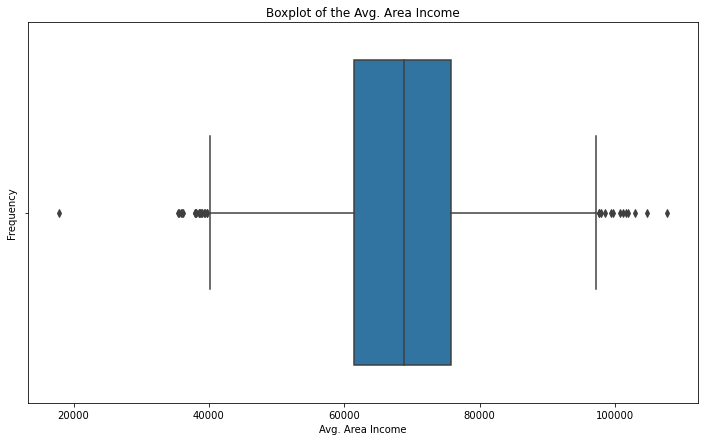

In [168]:
# To use the defined function for boxplot of the "average area income"
get_boxplot(x = "Avg. Area Income")
plt.title("Boxplot of the Avg. Area Income")
plt.xlabel("Avg. Area Income")
plt.ylabel("Frequency");      

**Observation**
- The distribution is skewed to both right and left hands as there are upper and lower outliers. The upper outliers are the very high average area income and the lower outliers are the ones with very low average area income. 
- the average mean and the median are 68583 and 68804, hence the distribution is normal
- The maximum average area income is 107702 while the least is 17796
- The 75% percentile which represents the 75% of the average area income is 75783 or less.
- The 25% lower quartile which represents the 25% of the average area income is 68583 or less.
- The lower wshisker is 40,000 while the upper whisker is close to 100,000

In [51]:
housing["Avg. Area Income"].describe()   # To show descriptive statistics of the average area income

count      5000.000000
mean      68583.108984
std       10657.991214
min       17796.631190
25%       61480.562388
50%       68804.286404
75%       75783.338666
max      107701.748378
Name: Avg. Area Income, dtype: float64

In [169]:
housing["Avg. Area Income"] = np.log(housing["Avg. Area Income"]) 
housing["Avg. Area Income"].describe()  # To correct the right skewed distribution using log scale

count    5000.000000
mean       11.123183
std         0.161333
min         9.786764
25%        11.026476
50%        11.139021
75%        11.235634
max        11.587121
Name: Avg. Area Income, dtype: float64

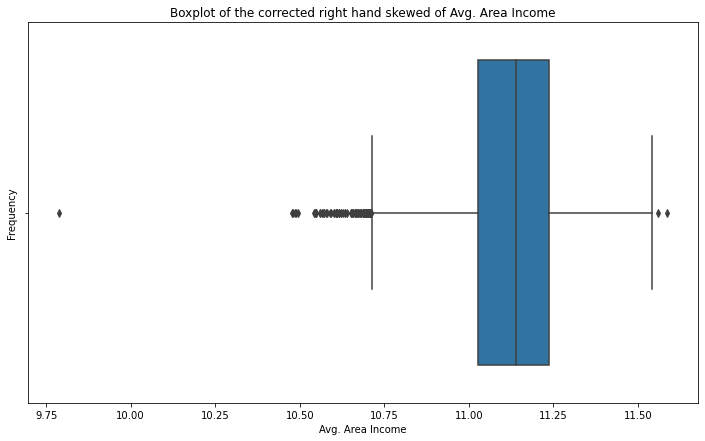

In [172]:
get_boxplot(x = "Avg. Area Income")
plt.title("Boxplot of the corrected right hand skewed of Avg. Area Income")
plt.xlabel("Avg. Area Income")
plt.ylabel("Frequency");   # used the defined function for boxplot of this corrected variable  

 **Boxplot of the corrected right-hand skewed "Average Area Income"**

**Observation**
- The avearge mean and the median are the same - a perfect normal distribution
- The outliers (skewedness) in the right hand has been corrected except few. This few are the ones with very high average area income
- The least avearge area income and the maximum average area income are very close
- The distribution is skewed to the left hand as there are many lower outliers. This implies some average area income are too low.



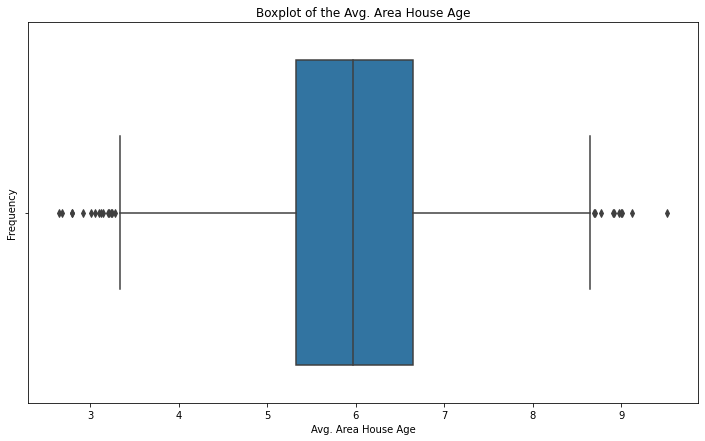

In [59]:
get_boxplot(x = "Avg. Area House Age");   # Boxplot of this variable using the defined function
plt.title("Boxplot of the Avg. Area House Age")
plt.xlabel("Avg. Area House Age")
plt.ylabel("Frequency");

**Observation**
- The distribution is skewed to both right and left hands. This means a few of the average area house age values are too high and are the upper outliers. The extreme low average area house age at the lower outliers.
- The average mean and the median are 6 and 6. This is a perfect normal distribution.
- The maximum average area house age is 9.5 while the least is 2.6
- The 75% percentile which represents the 75% of the average area house age is 6.7 or less.
- The 25% lower quartile which represents the 25% of the average area house age is 5.3 or less.
- The lower wshisker is above 3 while the upper whisker is close to 9

In [29]:
housing["Avg. Area House Age"].describe()  # The descriptive statistics of the average area house age

count    5000.000000
mean        5.977222
std         0.991456
min         2.644304
25%         5.322283
50%         5.970429
75%         6.650808
max         9.519088
Name: Avg. Area House Age, dtype: float64

In [63]:
housing["Avg. Area House Age"] = np.log(housing["Avg. Area House Age"])  
housing["Avg. Area House Age"].describe()  # Descriptive statistics after applying log scale 

count    5000.000000
mean        1.773582
std         0.172126
min         0.972408
25%         1.671902
50%         1.786819
75%         1.894738
max         2.253299
Name: Avg. Area House Age, dtype: float64

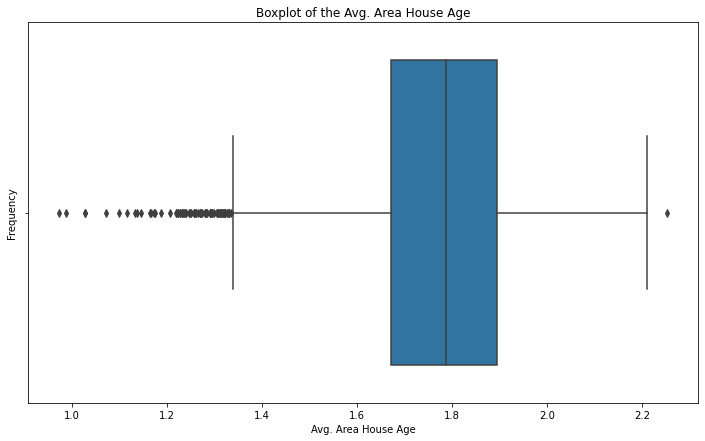

In [64]:
get_boxplot(x = "Avg. Area House Age") # Plot after the right skewed correction using the function
plt.title("Boxplot of the Avg. Area House Age")
plt.xlabel("Avg. Area House Age")
plt.ylabel("Frequency");

**Boxplot of the corrected right-hand skewed "Average Area House Age"**

**Observation**
- The outliers (skewedness) in the right hand has been corrected except few
- The distribution is skewed to the left hand as there are some average area house age values that are too low


In [37]:
housing["Avg. Area Number of Rooms"].describe() # To check descriptive statistics of the variable

count    5000.000000
mean        6.987792
std         1.005833
min         3.236194
25%         6.299250
50%         7.002902
75%         7.665871
max        10.759588
Name: Avg. Area Number of Rooms, dtype: float64

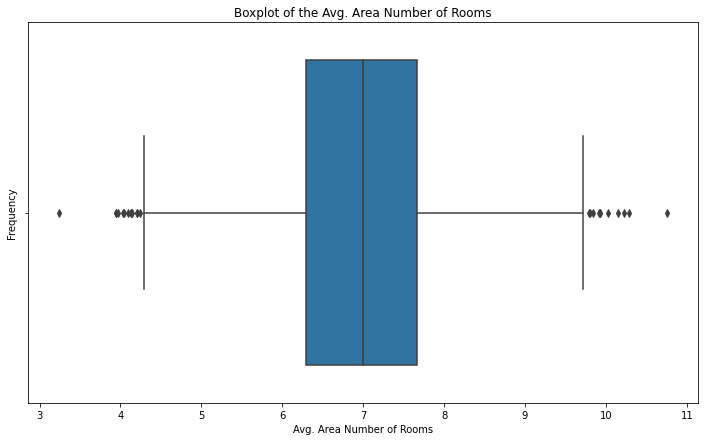

In [183]:
get_boxplot(x = "Avg. Area Number of Rooms")      
plt.title("Boxplot of the Avg. Area Number of Rooms")
plt.xlabel("Avg. Area Number of Rooms")
plt.ylabel("Frequency"); # Plot of the "Average Area Number of Rooms" variable using the function

**Observation**
- The distribution is skewed to both right and left hands. This means a few of the average area number of rooms are too high above the upper whisker. The extreme low average number of rooms are the lower outliers.
- The average mean and the median are the same, hence the distribution is perfectly normal.
- The maximum average area number of rooms is 10.8 and the least is 3.

In [66]:
housing["Avg. Area Number of Rooms"] = np.log(housing["Avg. Area Number of Rooms"])
housing["Avg. Area Number of Rooms"].describe()
             # Descriptive statistics after applying log scale to correct the right skewedness

count    5000.000000
mean        1.933427
std         0.148306
min         1.174398
25%         1.840431
50%         1.946325
75%         2.036778
max         2.375797
Name: Avg. Area Number of Rooms, dtype: float64

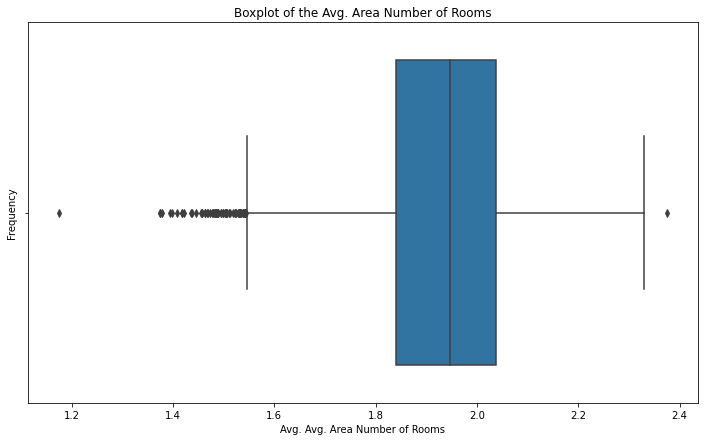

In [67]:
get_boxplot(x = "Avg. Area Number of Rooms")
plt.title("Boxplot of the Avg. Area Number of Rooms")
plt.xlabel("Avg. Area Number of Rooms")
plt.ylabel("Frequency");  # Boxplotting after the right skewed correction using the defined function

**The new boxplot of the log-scaled average area number of rooms shows that**

- The outliers (skewedness) in the right hand has been corrected except few. The few left shows very high average area number of rooms above the upper whisker.
- The distribution is skewed to the left hand as some average area number of rooms are too low

In [77]:
housing["Avg. Area Number of Bedrooms"].describe() # To check descriptive statistics of the variable

count    5000.000000
mean        3.981330
std         1.234137
min         2.000000
25%         3.140000
50%         4.050000
75%         4.490000
max         6.500000
Name: Avg. Area Number of Bedrooms, dtype: float64

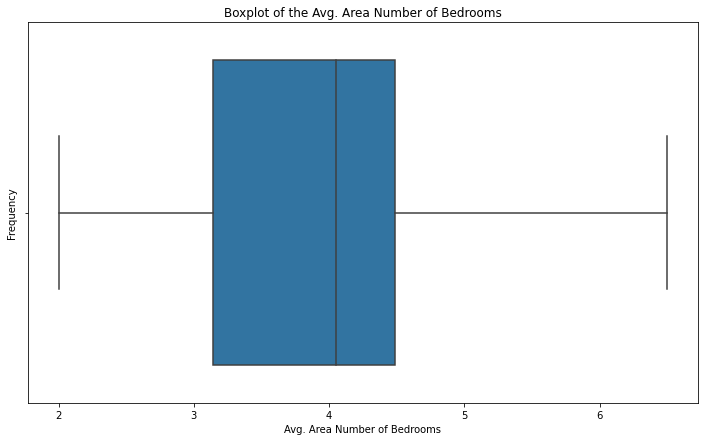

In [76]:
get_boxplot(x = "Avg. Area Number of Bedrooms")
plt.title("Boxplot of the Avg. Area Number of Bedrooms")
plt.xlabel("Avg. Area Number of Bedrooms")
plt.ylabel("Frequency");

                # Boxplot of the "Average Area Number of Bedrooms" variable using the defined function

**Observation**
- The average mean and the median are the same. This is a perfect normal distribution
- There is no outlier
- The maximum average area number of bedrooms is 6.5 and the least is 2.


In [43]:
housing["Area Population"].describe()    # To check descriptive statistics of the variable

count     5000.000000
mean     36163.516039
std       9925.650114
min        172.610686
25%      29403.928702
50%      36199.406689
75%      42861.290769
max      69621.713378
Name: Area Population, dtype: float64

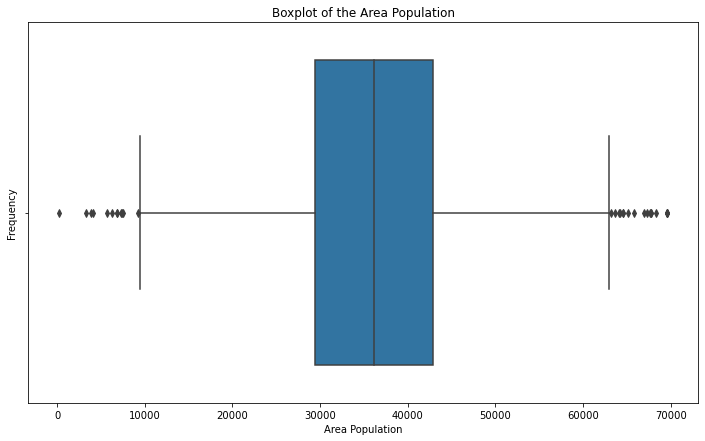

In [68]:
get_boxplot(x = "Area Population")
plt.title("Boxplot of the Area Population")
plt.xlabel("Area Population")
plt.ylabel("Frequency");    

                         # Boxplot of the "Area Population" variable using the defined function  

**Observation**
- The distribution is skewed to both right and left hands This means a few of the area population are too high and some are too low
- The maximum area population is 69621 while the minimum is 173.
- The average mean and the median are close, hence the distribution is normal.

In [69]:
housing["Area Population"] = np.log(housing["Area Population"])
housing["Area Population"].describe()
        
                 # Descriptive statistics after applying log scale to correct the right skewedness

count    5000.000000
mean       10.452269
std         0.316042
min         5.151039
25%        10.288884
50%        10.496798
75%        10.665724
max        11.150832
Name: Area Population, dtype: float64

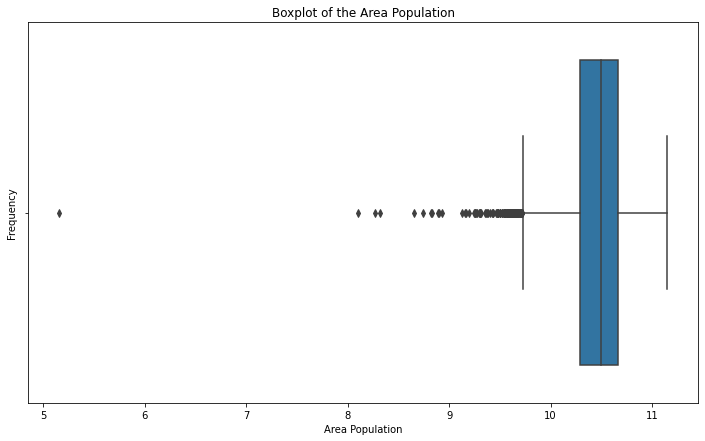

In [70]:
get_boxplot(x = "Area Population")
plt.title("Boxplot of the Area Population")
plt.xlabel("Area Population")
plt.ylabel("Frequency");   # Boxplotting after the right skewed correction using the defined function

**The new boxplot of the log-scaled area population shows that**

- The outliers (skewedness) in the right hand has been corrected
- The distribution is skewed to the left hand.

In [71]:
housing["Price"].describe()    # To check descriptive statistics of the variable

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

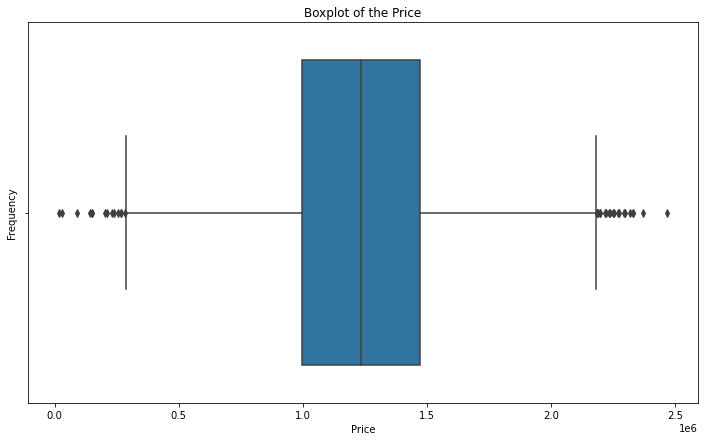

In [72]:
get_boxplot(x = "Price")
plt.title("Boxplot of the Price")
plt.xlabel("Price")
plt.ylabel("Frequency");   # Boxplot of the "Price" variable using the defined function

**Observation**
- The distribution is skewed to both right and left hands. Majority has price above 2.2, hence the upper outliers. A few also have price below 0.3, hence the lower outliers.
- The maximum price is 2.5M while the least is 1.6M
- The average mean and the median are 1.23M, hence this is a perfect normal distribution.

In [74]:
housing["Price"] = np.log(housing["Price"])
housing["Price"].describe()
         # Descriptive statistics after applying log scale to correct the right skewedness

count    5000.000000
mean        2.636999
std         0.024701
min         2.269701
25%         2.625616
50%         2.640820
75%         2.653354
max         2.689163
Name: Price, dtype: float64

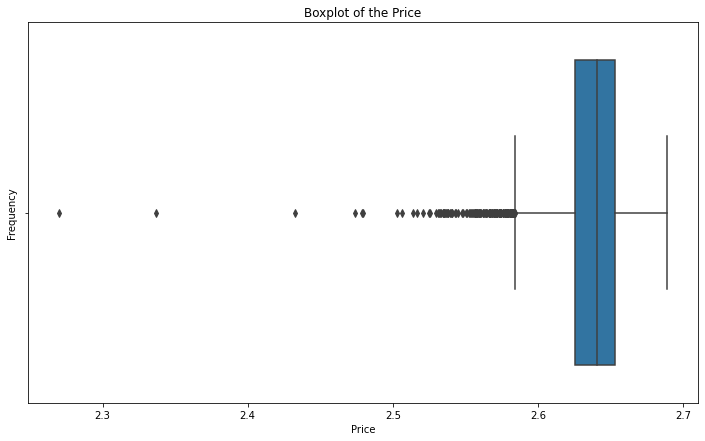

In [75]:
get_boxplot(x = "Price")
plt.title("Boxplot of the Price")
plt.xlabel("Price")
plt.ylabel("Frequency");   # Boxplotting after the right skewed correction using the defined function


**Observation**

- The outliers (skewedness) in the right hand has been corrected. 
- The average mean and the median are the same an the distribution is perfectly normal
- The highest price is 2.7 and the least 2.3
- The 75% percentile of the price which means 75% of the log-scaled price is 2.7 or less
- The 25% percentile of the price which means 25% of the price after applying log scale is 2.6 or less
- The distribution is skewed to the left hand. Majority has price less than 2.6.


#              Correlation plot

In [49]:
housing = housing.corr()
housing                         
        # Calling our data, apply correlation method and save it in a new variable; housing


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


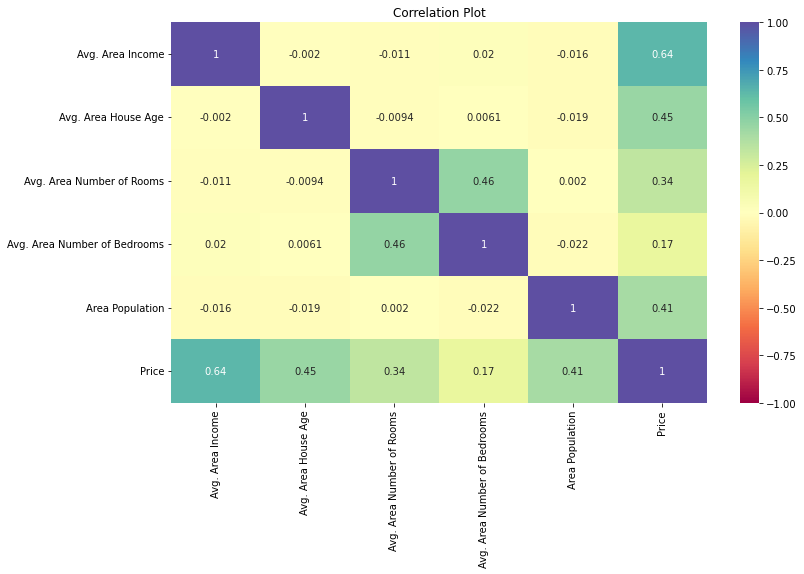

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(data =housing, annot= True, vmin= -1, vmax=1, cmap= "Spectral");
plt.title("Correlation Plot")
plt.show();    # Heatmap to show relationships among the variables             

# Points noted from the correlation plot
- The price and the average area income have the highest positive correlation of 0.61(twice).
- The averae area house age and the price have positive correlation of 0.43(twice). 
- The area population and the price have correlation at 0.37(twice)
- The average area number of rooms have correlation with the price at 0.32 (twice). 
- The average area number of the bedrooms has positive correlation at 0.16 (twice) with the price.

# Conclusion
 - All variables will be adopted as there are no highly positive or negative variables in the dataset.
 


# Bivariate Plots

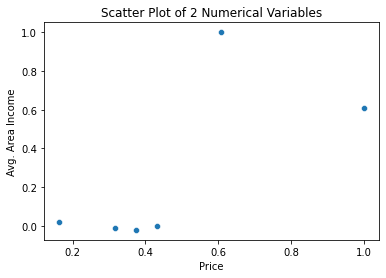

In [101]:
sns.scatterplot(data= housing, x ="Price", y = "Avg. Area Income");
plt.title("Scatter Plot of 2 Numerical Variables")
plt.xlabel("Price")
plt.ylabel("Avg. Area Income")
plt.show();

**Observation**
- The highest average area income (10) has the price of 6
- The highest price (10) has the average area income of 6
- Prices below 6 have the average area income of zero

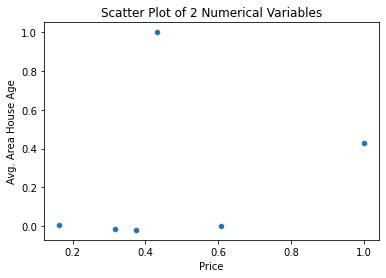

In [100]:
sns.scatterplot(data= housing, x ="Price", y = "Avg. Area House Age");
plt.title("Scatter Plot of 2 Numerical Variables")
plt.xlabel("Price")
plt.ylabel("Avg. Area House Age")
plt.show();

**Observation**
- The highest average area house age of 10 has a price of 4.
- The highest price of 10 has the average area house age of 4
- The prices below 4 and at exactly 6 have the average area house age of zero

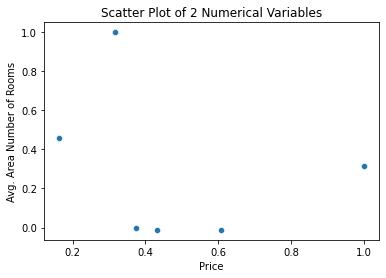

In [99]:
sns.scatterplot(data= housing, x ="Price", y = "Avg. Area Number of Rooms");
plt.title("Scatter Plot of 2 Numerical Variables")
plt.xlabel("Price")
plt.ylabel("Avg. Area Number of Rooms")
plt.show();

**Observation**
- The highest average area number of rooms is 10
- The highest price is 10
- The least two prices have the highest average number of rooms


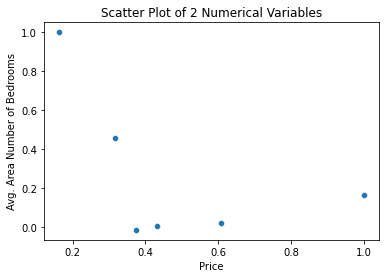

In [98]:
sns.scatterplot(data= housing, x ="Price", y = "Avg. Area Number of Bedrooms");
plt.title("Scatter Plot of 2 Numerical Variables")
plt.xlabel("Price")
plt.ylabel("Avg. Area Number of Bedrooms")
plt.show();

**Observation**
- The highest average area number of bedrooms is 10
- The highest price is 10
- The least two prices have the highest average number of bedrooms
- Prices between 3 and 6 have zero average area number of bedrooms

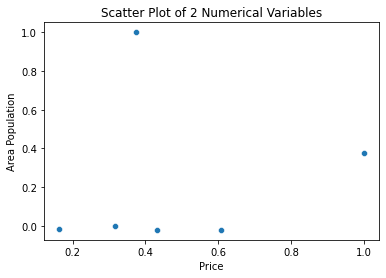

In [97]:
sns.scatterplot(data= housing, x ="Price", y = "Area Population");
plt.title("Scatter Plot of 2 Numerical Variables")
plt.xlabel("Price")
plt.ylabel("Area Population")
plt.show();

**Observation**
- The highest area population is 10 and the highest price is 10
- The highest area population has a price of 4
- The price of 10 has an area population of 4.
- The average population of 4 and the price of 10 are interdependent and vice-versa.
- Other prices have zero area population

# To build linear regression....

In [55]:
housing.shape      # To check the dimension of the data


(5000, 6)

In [58]:
 # Dropping the dependent variable "Price" & assign new variable "X" to the dataset
X = housing.drop("Price", axis =1)
         

In [59]:
y = housing["Price"]   # Assigning new variable to the dependent variable "Price"

In [64]:
# To import a function to split our data
from sklearn.model_selection import train_test_split   

# To split data into 80% for training and 20% for testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 

In [63]:
x_train.shape     # To check the dimension of the train data


(4000, 5)

In [61]:
x_test.shape            # To check the dimension of the test data


(1000, 5)

#     To standardise the data....

In [182]:
from sklearn.preprocessing import StandardScaler 
 # To import a function scale our varibales btw a mean and variance of 0 and 1

scaler = StandardScaler()  # To create an instance of the StandardScaler

x_train_scaler =scaler.fit_transform(x_train)

 # To use the scaler to calculate the mean and varaince of each variable and convert each varaible 
    # to have a mean and varaince of 0 and 1

x_test_scaler = scaler.transform(x_test)

 # To use the scaler to convert each variable to have a mean and standard deviation of 0 and 1

In [158]:
from sklearn.linear_model import LinearRegression   # To build Linear regression model

lr = LinearRegression()

lr.fit(x_train_scaler, y_train)

LinearRegression()

In [177]:
lr.coef_                          # To know the values of the coefficients

array([1947950.30981597, 1127879.44571508,  908707.45159353,
          6941.36104221, 1005018.90342024])

In [160]:
for idx, col_name in enumerate(X.columns):           
    print(f"{col_name} has coefficient of {lr.coef_[idx]}")
     # To loop through the coefficients in order to know the coefficent of each independent variable

Avg. Area Income has coefficient of 1947950.309815968
Avg. Area House Age has coefficient of 1127879.445715077
Avg. Area Number of Rooms has coefficient of 908707.4515935319
Avg. Area Number of Bedrooms has coefficient of 6941.361042213575
Area Population has coefficient of 1005018.903420244


# Interpretation
- Any unit increase in the "area population" will lead to 1.0*10^6 positive increase in the dependent 
variable "Price".
- Any unit increase in the independent variable "Average area Number of Bedrooms" will lead to 
positive increase of 6.9*10^3 in the "Price" variable.
- A unit increase in the "Average area Number of Rooms" variable will cause a positive increase of
9.1*10^5 in the dependent variable "Price".
- A unit increase in the "Average Area House Age" will lead to positive increase of 1.1*10^6 in 
the "Price" variable.
- A positive increase of approximately 2.0*10^6 occurs in the dependent variable "Price" for every 
unit increase in the "Average Area Income" variable.


In [161]:
# To check model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [163]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [165]:
model_performance_regression(lr, x_train_scaler, y_train) # To know the performance of the train data

,RMSE,MAE,R-squared,Adj. R-squared
0,100706.716014,81076.253952,0.917008,0.916904


# The training data has
- The root mean squared error of 100707
- The mean absolute error of 81076
- The R-squared of 0.917008
- The adjusted R-squared of 0.916908.

# Interpretation
- The R-squared of 92% means that 92% variation of the dependent variable "Price" is explained by the 
independent variables.

In [61]:
lr.score(x_train_scaler, y_train)  # To check the percentage of the accuracy

0.9170083707375688

**Observation**
- The training data has an accuracy of 91.7%

In [166]:
model_performance_regression(lr, x_test_scaler, y_test) # To know the performance of the test data

,RMSE,MAE,R-squared,Adj. R-squared
0,102682.020401,82494.737701,0.921594,0.921199


# The testing data has
- The root mean squared error of 102682
- The mean absolute error of 82495
- The R-squared of 0.921594
- The adjusted R-squared of 0.921199
# Interpretation
- The R-squared of 92% means that 92% variation of the dependent variable "Price" is explained by 
the independent variables in this linear regression model.
# Conclusion
- This linear regression model generalizes well both on the testing and the training data.